![logo1](./logo2.png)

![logo1](./Capture.png)

# **Problem Statement:**
This data set consists of the physical parameters of three species of flower — Versicolor, Setosa and Virginica. The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length. In this data we will be predicting the classes of the flowers based on these parameters.The data consists of continuous numeric values which describe the dimensions of the respective features. We will be training the model based on these features.


# **About Dataset**

This is perhaps the best known database to be found in the pattern
recognition literature.  Fisher's paper is a classic in the field
and is referenced frequently to this day.  (See Duda & Hart, for
example.)  The data set contains 3 classes of 50 instances each,
where each class refers to a type of iris plant.  One class is
linearly separable from the other 2; the latter are NOT linearly
separable from each other.



* Predicted attribute: class of iris plant.

* This is an exceedingly simple domain.

* This data differs from the data presented in Fishers article (identified by Steve Chadwick,  spchadwick@espeedaz.net )

* The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature.

* The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.  

* Number of Instances: 150 (50 in each of three classes)
* Number of Attributes: 4 numeric, predictive attributes and the class
* Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      * Iris Setosa
      * Iris Versicolour
      * Iris Virginica
* Missing Attribute Values: None
* Summary Statistics:
    
  Attributes   | Min  | Max | Mean | SD   | Class Correlation
  -------------|:----:|:---:|:----:|:----:|:-----------------:
  sepal length |4.3   | 7.9 | 5.84 | 0.83 | 0.7826     
  sepal width  |2.0   | 4.4 | 3.05 | 0.43 |-0.4194  
  petal length |1.0   | 6.9 | 3.76 | 1.76 | 0.9490  (high!)
  petal length |0.1   | 2.5 | 1.20 | 0.76 | 0.9565  (high!)
  
  
* Class Distribution: 33.3% for each of 3 classes.



In [2]:
# Importing necessary modules

from sklearn.neighbors import KNeighborsClassifier  # Model Training
from sklearn.svm import SVC  # Model Training
from sklearn.linear_model import LogisticRegression  # Model Training
from sklearn.preprocessing import StandardScaler  # Data Standardization
from sklearn.model_selection import train_test_split  # Feature Extraction
from sklearn import preprocessing  # Data Standardization
from sklearn.metrics import accuracy_score
#from sklearn.metrics import classification_report
import warnings  # current version of seaborn generates a bunch of warnings that we'll ignore
import matplotlib.pyplot as plt  # EDA
import pickle
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # EDA
sns.set(style="white", color_codes=True)
%matplotlib inline
warnings.filterwarnings("ignore")


# **Data Analysis:-**

In [3]:
#Column names:
from sklearn import datasets
col_names = ['sepal-length', 'sepal-width','petal-length', 'petal-width', 'species']

# reading the dataset into the data frame
# if the dataset is in the same folder as the .ipynb notebook
df = pd.read_csv("iris_t_1.csv", names=col_names)

#loading the iris dataset


iris = datasets.load_iris()
# if the dataset is not in the same folder as the .ipynb notebook
# df = pd.read_csv("Path of the location of the dataset",names = )
df

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head()#Show First 5 column

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail(6)# show last 6 column

,sepal-length,sepal-width,petal-length,petal-width,species
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.describe()  # show statistical information about data 

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()# basic information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.shape[0] # shape of the dataset
df.shape[1]
print('There are Total {} column and {} rows in Dataset'.format(df.shape[1],df.shape[0]))

There are Total 5 column and 150 rows in Dataset


In [9]:
df.dtypes# show data types of each column

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
species          object
dtype: object

In [10]:
df['species'].value_counts() # show total entry each species

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

## **This data are balanced, and there are no missing values.**

In [11]:
df.isnull().sum() #check null values in dataset 

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
species         0
dtype: int64

In [12]:
df.ndim # check dimension

2

In [13]:
df.columns #display column name

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width',
       'species'],
      dtype='object')

In [14]:
df.max() #check maximum value in each column

sepal-length               7.9
sepal-width                4.4
petal-length               6.9
petal-width                2.5
species         Iris-virginica
dtype: object

In [15]:
print(df.duplicated().sum()) # check duplicate value 
df[df.duplicated()]


3


,sepal-length,sepal-width,petal-length,petal-width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


## There are three Duplicates, but as their delete this value  will lead to dataset imbalance, we will not drop them.

# **Exploratory Data Analysis (EDA):**


# **Bar Plot:**
A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. The bar plots can be plotted horizontally or vertically. A bar chart describes the comparisons between the discrete categories. One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured values corresponding to those categories.

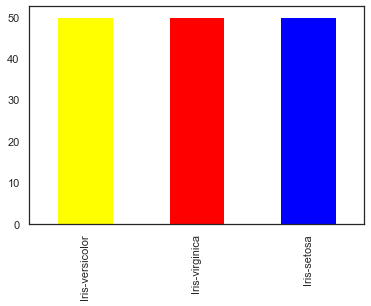

In [16]:
df['species'].value_counts().plot(kind='bar', color=['yellow', 'red', 'blue'])
plt.show()

# **Scatter Plot:**
Scatter plots are used to observe relationship between variables and uses dots to represent the relationship between them. The scatter() method in the matplotlib library is used to draw a scatter plot. Scatter plots are widely used to represent relation among variables and how change in one affects the other.


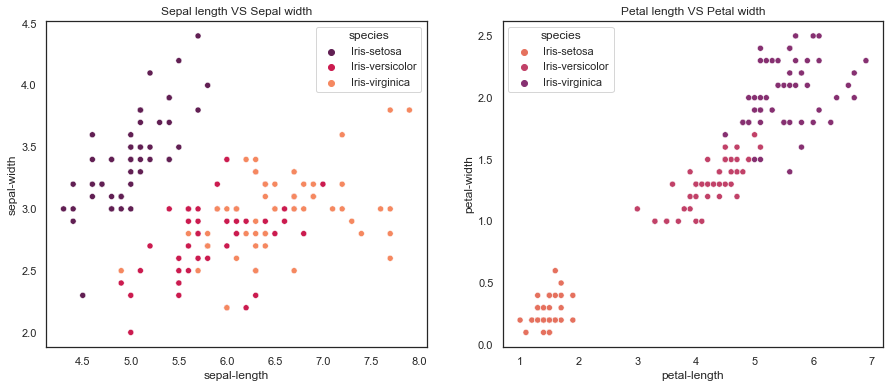

In [17]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.scatterplot(ax=ax[0], x="sepal-length", y="sepal-width",hue='species', data=df, palette="rocket")
sns.scatterplot(ax=ax[1], x="petal-length", y="petal-width",hue='species', data=df, palette="flare")
ax[0].set_title("Sepal length VS Sepal width")
ax[1].set_title("Petal length VS Petal width")
plt.show()

# **Explain above plot:**

From the first plot, we see that
* "Iris-setosa" has smaller sepal_length and greater sepal_width
* "Iris-versicolor" has a everage sepal_length and sepal_width
* "Iris-virginica" has greater sepal_length and smaller sepal_width

From the second plot, we see that
* "Iris-setosa" has smaller petal_length and smaller sepal_width
* "Iris-versicolor" has a average petal_length and petal_width
* "Iris-virginica" has greater petal_length and greater petal_width

# **Correlation:**
Correlation summarizes the strength and direction of the linear(straight-line) association between two quantitative variables. A positive value for r indicates a positive association, and a negative value for r indicates a negative association.

The number varies from -1 to 1.

* 1 means that there is a 1 to 1 relationship(a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

* 0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.

* -0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.

* 0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.


In [18]:
df.corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


In [19]:
df.corr().style.background_gradient(cmap='autumn').set_precision(2)

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.00,-0.11,0.87,0.82
sepal-width,-0.11,1.00,-0.42,-0.36
petal-length,0.87,-0.42,1.00,0.96
petal-width,0.82,-0.36,0.96,1.00


# **Heat Map:**
 **A heat map (or heatmap) is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.**

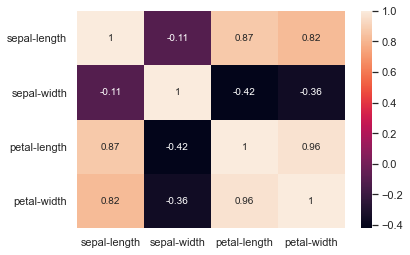

In [20]:
plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.show()

# **Violin plot:**

**A violin plot plays a similar activity that is pursued through whisker or box plot do. As it shows several quantitative data across one or more categorical variables. It can be an effective and attractive way to show multiple data at several units.**

**Plotting the violin plot to check the comparison of a variable distribution:**


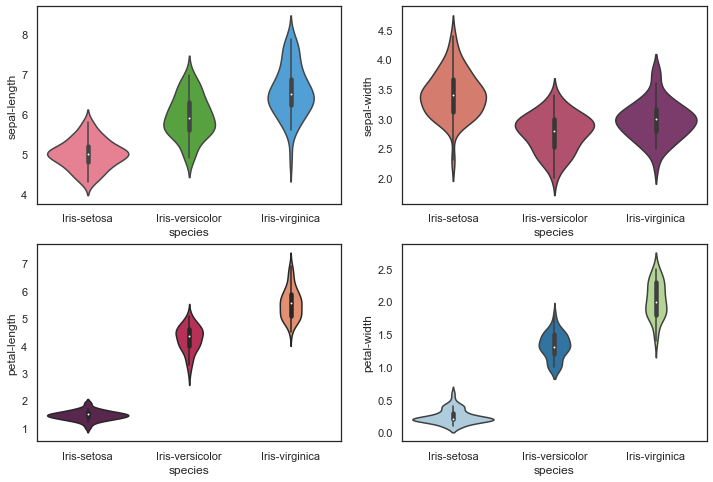

In [21]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.violinplot(x='species', y='sepal-length', data=df, palette="husl")
plt.subplot(2, 2, 2)
sns.violinplot(x='species', y='sepal-width', data=df, palette="flare")
plt.subplot(2, 2, 3)
sns.violinplot(x='species', y='petal-length', data=df, palette="rocket")
plt.subplot(2, 2, 4)
sns.violinplot(x='species', y='petal-width', data=df, palette="Paired")
plt.show()

## **Histogram:**

**A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.**


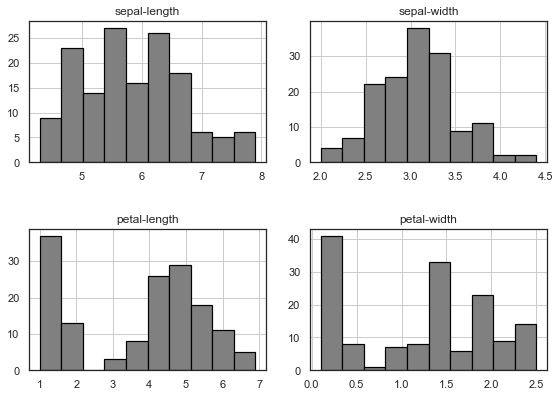

In [22]:
df.hist(edgecolor='black', linewidth=1.2, color='gray')
fig = plt.gcf()
plt.tight_layout()
fig.set_size_inches(8, 6)


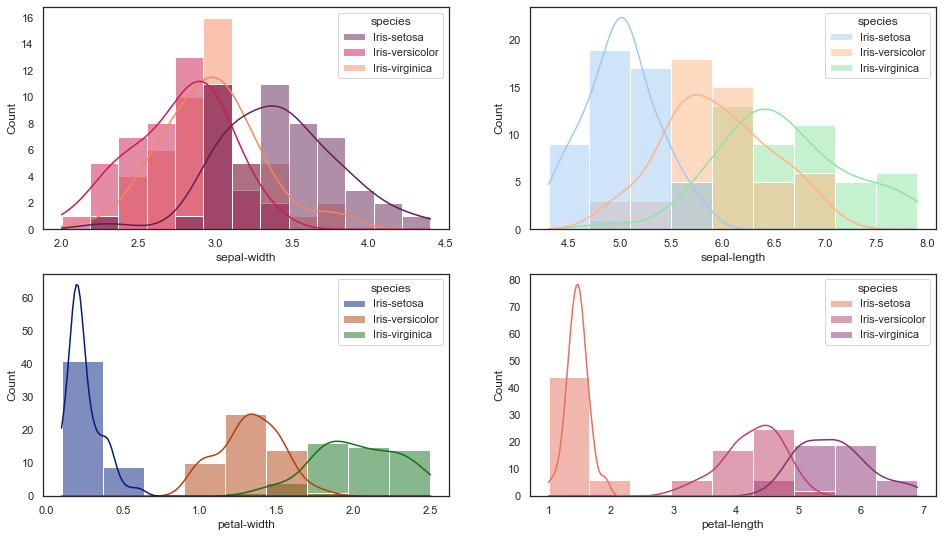

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9))
sns.histplot(ax=axes[0, 0], data=df, x='sepal-width',hue='species', kde=True, palette="rocket")
sns.histplot(ax=axes[0, 1], data=df, x='sepal-length',hue='species', kde=True, palette="pastel")
sns.histplot(ax=axes[1, 0], data=df, x='petal-width',hue='species', kde=True, palette="dark")
sns.histplot(ax=axes[1, 1], data=df, x='petal-length',hue='species', kde=True, palette="flare")
plt.show()

# **Conclusions drawn from Exploratory Data Analysis (EDA):**
1. The dataset choosen is balanced, as there are equal number of records in all the three species.
2. We have four numerical columns and one is just a categorical column,  which is our target variable.
3. Strong correlation is present in between the petal length and petal width as the value of correlaton is 0.96.
4. The Iris-setosa species are most distinguishable because it sepeartes itself from other features because of its small size.
5. The Versicolor and Virginica species are usually mixed and are sometimes hard to separate. While usually Versicolor has average feature sizes, virginica has larger feature sizes.
6. We do have some outliers and duplicates but we just have 150 records, and outliers are not putting a big impact. So we have not wrangled them.

# **Label Encoders for the dataset:**
**In machine learning, we usually deal with datasets that contain multiple labels in one or more than one column. These labels can be in the form of words or numbers. To make the data understandable or in human-readable form, the training data is often labelled in words.**

**Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.**

![Example](./label2.png)

In [24]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['species'] = label_encoder.fit_transform(df['species'])

df['species'].unique()


array([0, 1, 2])

In [25]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
df.tail()

,sepal-length,sepal-width,petal-length,petal-width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# **Dividing data into features and labels (FEATURE SELECTION):**

In [27]:
# Seperating the data into dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [28]:
# Splitting the dataset into the Training and Testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=5)
# Here: traiining dataset = 70% and testing dataset = 30%

# Data Standardisation:
1. Data standardization is the process of converting data to a common format to enable users to process and analyze it.
2. Data standardization means your data is internally consistent — each of your data sources has the same format and labels. When your data is neatly organized with logical descriptions and labels, everyone in your organization can understand it and put it to use.
3. The purpose of data standardization is to make your data consistent and clear. Consistent is ensuring that the output is reliable so that related data can be identified using common terminology and format.
4. In sklearn.preprocessing.StandardScaler(), centering and scaling happens independently on each feature.

In logistic regression, we will do feature scaling because we want accurate result of predictions. Here we will only scale the independent variable because dependent variable have only 0 and 1 values.

In [29]:
#feature Scaling
std_x = StandardScaler()
X_train = std_x.fit_transform(X_train)
X_test = std_x.transform(X_test)

# **Logistic Regression Model(LR):-**
**Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.)**

In [30]:
#Fitting Logistic Regression to the training set  
classifier=LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Predicting the test dataset result
y_pred = classifier.predict(X_test)

We have created a y_pred vector to predict the test set result in the above code.

In [32]:
y_pred

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2])

In [33]:
print('accuracy is', accuracy_score(y_pred, y_test)*100, "%")

accuracy is 92.10526315789474 %


In [34]:
# Accuracy of the model
acc = round(accuracy_score(y_pred, y_test)*100, 2)
print('Accuracy for LR is', acc, "%")


Accuracy for LR is 92.11 %


# **Support Vector Machine(SVM):-**
* “Support Vector Machine” (SVM) is a supervised machine learning algorithm that can be used for both classification or regression challenges. However, it is mostly used in classification problems. 
* Support vector machines are a set of supervised learning methods used for classification, regression, and outliers detection. All of these are common tasks in machine learning.
* In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well.

**HOW DOES SVM WORK?**
A simple linear SVM classifier works by making a straight line between two classes. That means all of the data points on one side of the line will represent a category and the data points on the other side of the line will be put into a different category. This means there can be an infinite number of lines to choose from.

**STEPS:**
* Import the dataset
* Explore the data to figure out what they look like
* Pre-process the data
* Split the data into attributes and labels
* Divide the data into training and testing sets
* Train the SVM algorithm
* Make some predictions
* Evaluate the results of the algorithm

In [35]:
classifier_1 = SVC(random_state=5)
classifier_1.fit(X_train, y_train)

SVC(random_state=5)

In [36]:
#Predicting the test set result
y_pred1 = classifier_1.predict(X_test)

In [37]:
y_pred1

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2])

In [38]:
# Accuracy of the model
acc1 = round(accuracy_score(y_pred1, y_test)*100, 2)
print('Accuracy of SVM is', acc1, "%")


Accuracy of SVM is 94.74 %


# **K-Nearest Neighbour Classifier(KNN):**
It is the learning where the value or result that we want to predict is within the training data (labeled data) and the value which is in data that we want to study is known as Target or Dependent Variable or Response Variable.

 All the other columns in the dataset are known as the Feature or Predictor Variable or Independent Variable.

The following steps will help us understand the working:

1. We must load the training as well as test data from the loaded dataset.
2. We need to choose the value of K (the nearest data points). It can be any integer.
3. * Calculate the distance between test data and each row of training data with the help of any of the method namely: **Euclidean, Hamming distance**. *The most **commonly used method** to calculate distance is **Euclidean**.*
* Based on the distance value, sort them in ascending order.
* It (the algorithm) will choose the top K rows from the sorted array.
* It will assign a class to the test point based on most frequent class of these rows.
4. Model Created Successfully.

In [39]:
#Fitting K-NN classifier to the Training data
classifier_2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier_2.fit(X_train, y_train)

KNeighborsClassifier()

* ***n_neighbors***: To define the required neighbors of the algorithm. Usually, it takes 5.
* ***metric = 'minkowski'***: This is the default parameter and it decides the distance between the points.
* ***p = 2***: It is equivalent to the standard Euclidean metric.


In [40]:
#Predicting the test set result
y_pred2 = classifier_2.predict(X_test)


In [41]:
y_pred2

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2])

In [42]:
print('accuracy is', accuracy_score(y_pred2, y_test)*100, "%")


accuracy is 94.73684210526315 %


In [43]:
classifier_2 = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=2)
classifier_2.fit(X_train, y_train)
prediction = classifier_2.predict(X_test)

In [44]:
# Accuracy of the model
acc2 = round(accuracy_score(prediction, y_test)*100, 2)
print('Accuracy of KNN is', acc2, "%")


Accuracy of KNN is 97.37 %


# **Decide which is the Best Model:**

In [45]:
results = pd.DataFrame({
    'Models': ['Logistic Regression','Support Vector Machine (SVM)','K-Nearest Neighbours'],
    "Accuracy-score":[acc,acc1,acc2]})
result_df = results.sort_values(by='Accuracy-score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head()


,Models,Accuracy-score
0,K-Nearest Neighbours,97.37
1,Support Vector Machine (SVM),94.74
2,Logistic Regression,92.11


# **Plotting a graph of the Accuracies of the models:**

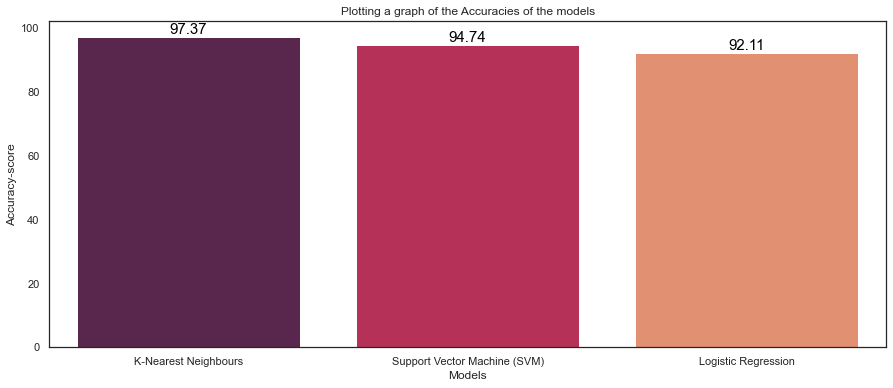

In [46]:
#Plotting a graph of the Accuracies of the models:

plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='Models', y="Accuracy-score",data=result_df, palette="rocket")
labels = (result_df["Accuracy-score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment='center', size=15, color='black')
plt.title('Plotting a graph of the Accuracies of the models')
plt.show()

# **Conclusion:**
We have just implemented some of the basic data preparation and exploration steps, followed by Exploratory Data Analysis and a few common Machine Learning Algorithms on the iris dataset.
**I would prefer K-Nearest Neighbours on this dataset because it predicts more accurate result than the other Machine Learning models.**


# **THANK YOU**
## **DKG12